# 因子分析

本notebook用于计算和评估5个交易量相关的技术因子。

In [1]:
# 导入必要的库
import sys
import traceback
from factor_calculator import FactorCalculator
from factor_metrics import FactorMetrics
from returns_calculator import ReturnsCalculator
import warnings
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## 1. 数据加载和因子计算，并保存因子数据

In [2]:
# 设置数据目录
data_dir = "data"

# 检查数据文件是否存在
if not os.path.exists(os.path.join(data_dir, 'stock_data.pkl')):
    raise FileNotFoundError("找不到数据文件: stock_data.pkl")

# 初始化因子计算器
calculator = FactorCalculator(data_dir)

# 计算所有因子
factors = calculator.calculate_all_factors()
print("因子计算完成")


开始计算因子...


计算因子进度:  33%|███▎      | 1/3 [00:08<00:17,  8.51s/it]


Factor1 计算完成


计算因子进度:  67%|██████▋   | 2/3 [00:14<00:07,  7.19s/it]


Factor2 计算完成


计算因子进度: 100%|██████████| 3/3 [00:21<00:00,  7.17s/it]


Factor3 计算完成

所有因子计算完成
因子计算完成


In [3]:
# 保存为pickle文件
factors_pickle_path = os.path.join(data_dir, 'factors.pkl')
with open(factors_pickle_path, 'wb') as f:
    pickle.dump(factors, f)
print(f"因子数据已保存至 {factors_pickle_path}")

因子数据已保存至 data\factors.pkl


## 2.计算收益率数据并保存

In [2]:
# 设置数据目录
data_dir = "data"

# 初始化收益率计算器
calculator = ReturnsCalculator(data_dir)

# 计算收益率
returns = calculator.calculate_returns()


加载价格数据和复权因子...
价格数据和复权因子加载完成
开始计算未来收益率...


计算不同周期未来收益率: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


保存未来收益率数据...
未来收益率数据已保存至 data\returns_return_1d.pkl
未来收益率数据已保存至 data\returns_return_5d.pkl
未来收益率数据已保存至 data\returns_return_10d.pkl
未来收益率数据已保存至 data\returns_return_20d.pkl


## 3. 计算因子指标

In [3]:
# 初始化 FactorMetrics 类
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data(start_date='2015-01-01', end_date='2024-12-31')

# 计算所有因子的IC
ic_series_df, ic_stats_df = factor_metrics.calculate_all_factors_ic(factors, returns)

# 查看IC统计信息
print("\n所有因子的IC统计信息：")
ic_stats_df


加载因子数据...
加载收益率数据...

数据预处理完成。
计算所有因子的IC...

计算因子 Factor1 的IC...
Factor1 IC统计信息:
IC均值: 0.0394
IC标准差: 0.1257
IC_IR: 4.9811
IC为正的比例: 64.91%

计算因子 Factor2 的IC...
Factor2 IC统计信息:
IC均值: 0.0426
IC标准差: 0.0909
IC_IR: 7.4360
IC为正的比例: 69.27%

计算因子 Factor3 的IC...
Factor3 IC统计信息:
IC均值: 0.0416
IC标准差: 0.0903
IC_IR: 7.3064
IC为正的比例: 69.89%

所有因子IC计算完成

所有因子的IC统计信息：


,IC_mean,IC_std,IC_IR,IC_positive_ratio,factor_direction
Factor2,0.042566,0.090870,7.435964,0.692719,-1
Factor3,0.041576,0.090331,7.306419,0.698889,-1
Factor1,0.039439,0.125691,4.981112,0.649116,-1


In [5]:
# 绘制IC相关性热力图
factor_metrics.plot_ic_heatmap(
    ic_series_df,
    save_path='ic_results/ic_correlation.png'
)

# 绘制IC时间序列图
factor_metrics.plot_ic_ts(
    ic_series_df,
    save_path='ic_results/ic_timeseries.png'
)

# 保存结果
ic_series_df.to_csv('ic_results/ic_series.csv')
ic_stats_df.to_csv('ic_results/ic_stats.csv')


IC相关性热力图已保存至: ic_results/ic_correlation.png
IC时间序列图已保存至: ic_results/ic_timeseries.png


## 4. 计算和可视化因子相关性

加载因子数据...
加载收益率数据...

数据预处理完成。


<Figure size 640x480 with 0 Axes>

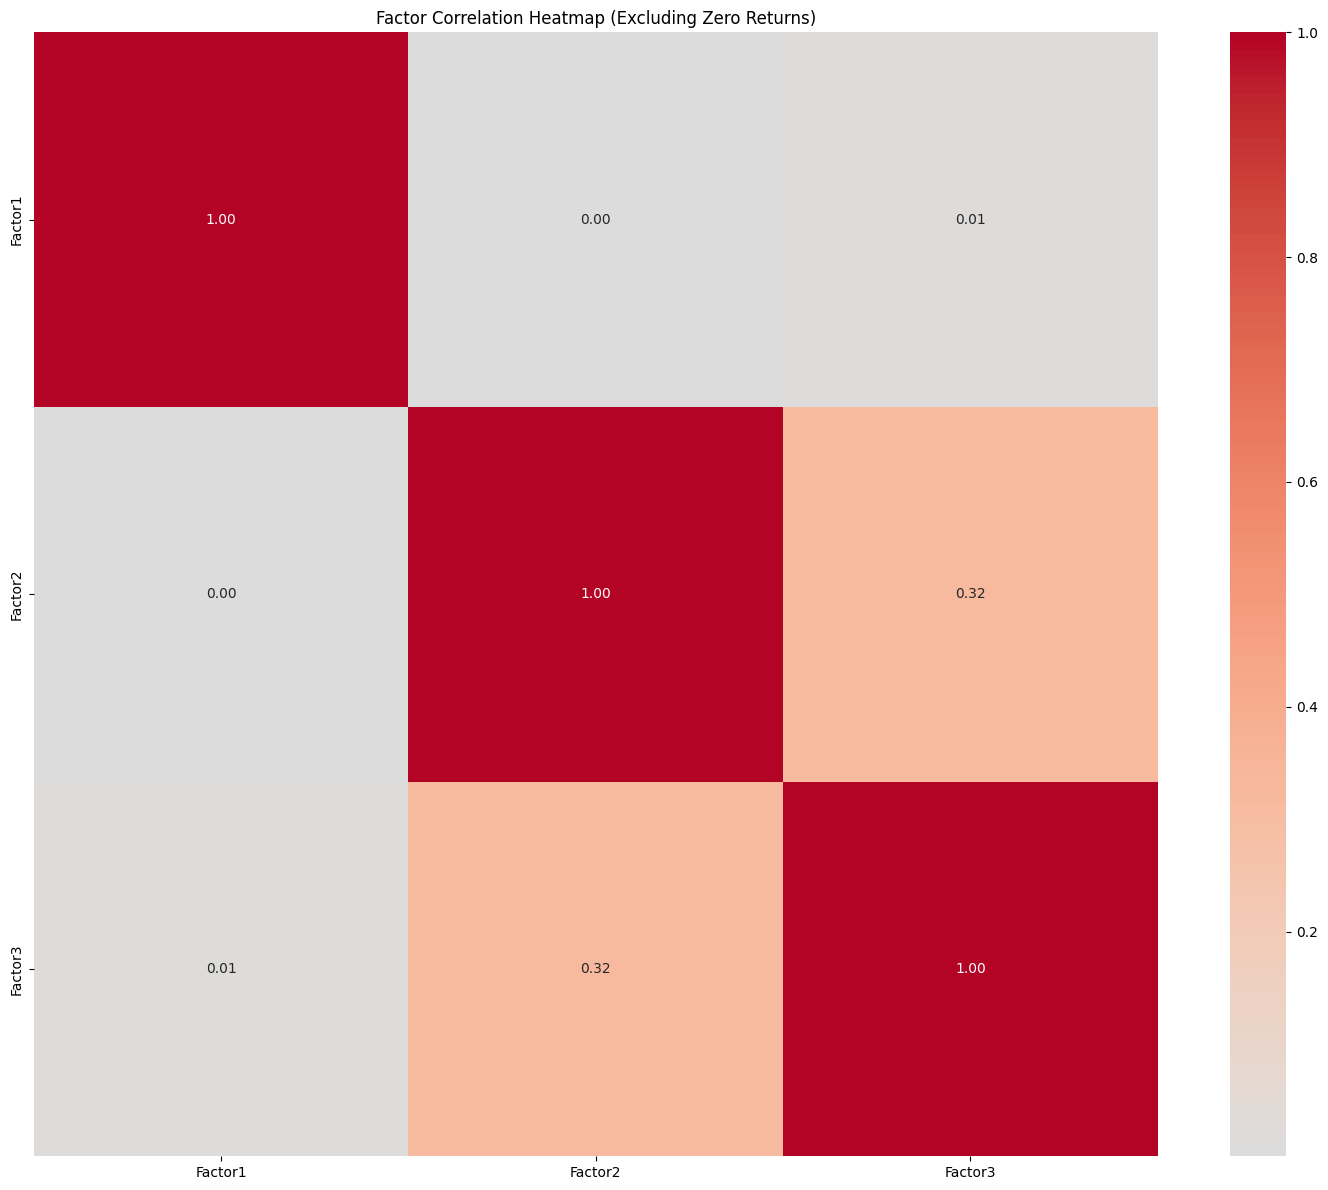

因子相关性热力图已保存至: factor_results/factor_correlation.png

相关性矩阵：


,Factor1,Factor2,Factor3
Factor1,1.000000,0.000172,0.014608
Factor2,0.000172,1.000000,0.317956
Factor3,0.014608,0.317956,1.000000


In [4]:
# 初始化
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data()

# 计算相关性矩阵并画图
corr_matrix = factor_metrics.plot_factor_corr(
    factors,
    returns,  
    save_path='factor_results/factor_correlation.png'
)

# 如果需要查看相关性矩阵
print("\n相关性矩阵：")
corr_matrix

## 5.画出每个因子每组的收益曲线

计算5分组收益...
分组收益曲线已保存至: factor_results/factor1_returns_analysis.png


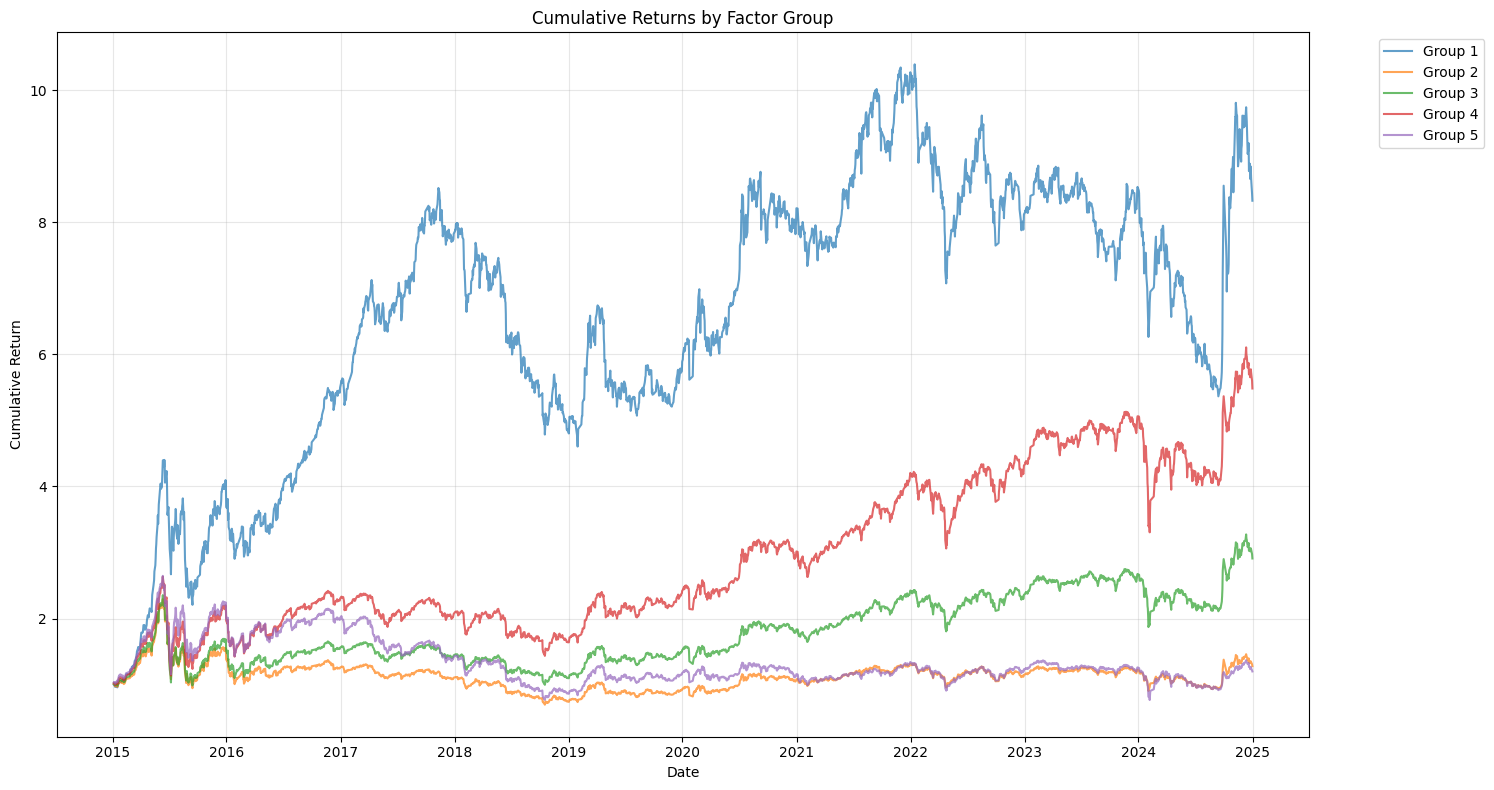


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor1,,,,,,
0,0.269382,0.314856,0.855574,-0.498106,0.554093,0.855574
1,0.070908,0.299523,0.236737,-0.696050,0.543809,0.236737
2,0.155544,0.297644,0.522584,-0.580109,0.556150,0.522584
3,0.224183,0.307342,0.729426,-0.567377,0.559852,0.729426
4,0.073038,0.327096,0.223291,-0.709589,0.537639,0.223291


In [7]:
# 初始化
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data()

# 选择要分析的因子
factor_name = 'Factor1'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=-1,  # 因子方向
    save_path='factor_results/factor1_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics


计算5分组收益...
分组收益曲线已保存至: factor_results/factor2_returns_analysis.png


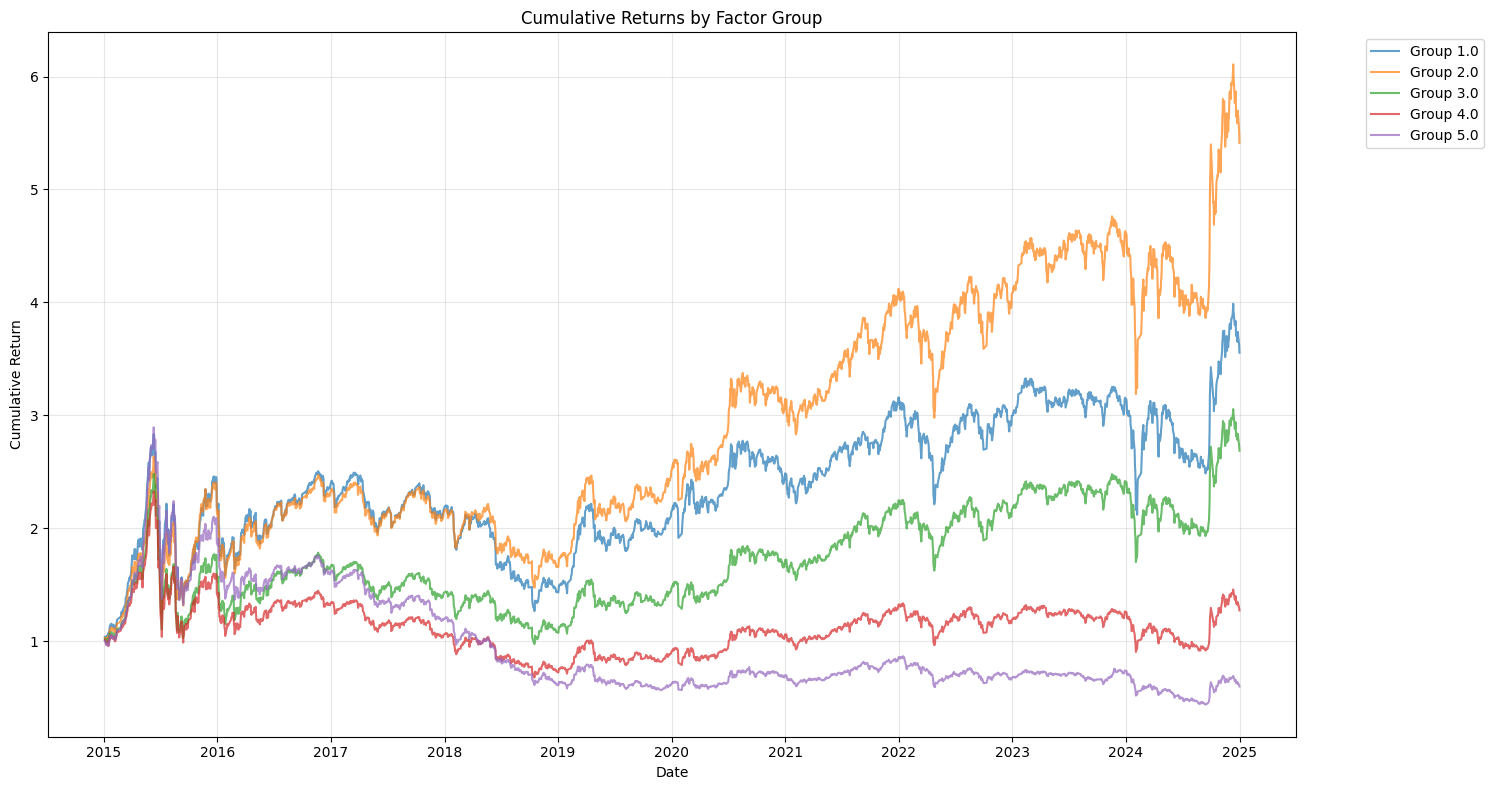


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor2,,,,,,
0.0,0.179489,0.308189,0.582401,-0.553415,0.544632,0.582401
1.0,0.222697,0.307074,0.725223,-0.528540,0.552859,0.725223
2.0,0.150034,0.306963,0.488769,-0.607567,0.554504,0.488769
3.0,0.071966,0.305392,0.235652,-0.708932,0.538873,0.235652
4.0,-0.008211,0.299268,-0.027437,-0.849288,0.522419,-0.027437


In [5]:
# 选择要分析的因子
factor_name = 'Factor2'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor2_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics

计算5分组收益...
分组收益曲线已保存至: factor_results/factor3_returns_analysis.png


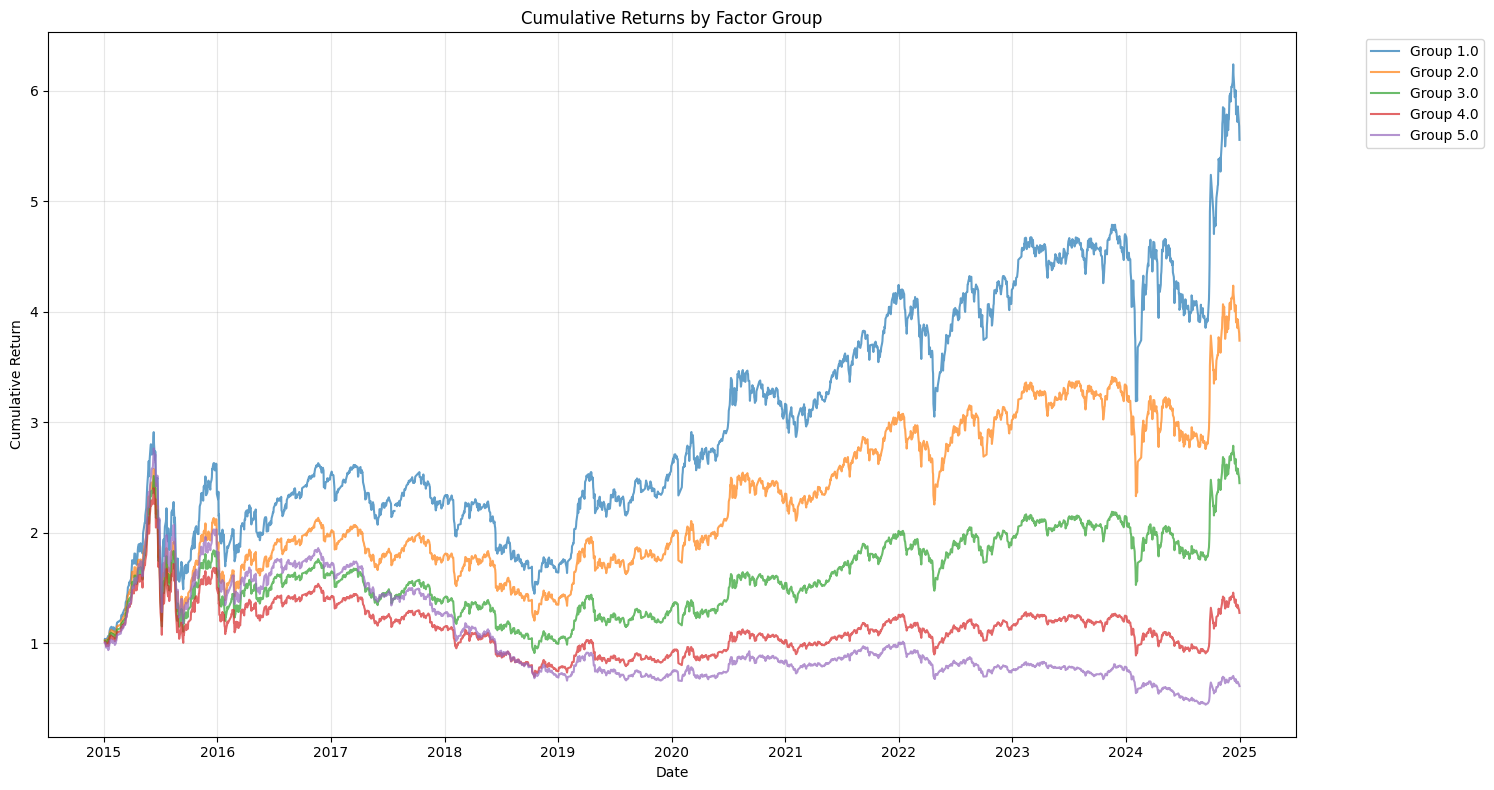


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor3,,,,,,
0.0,0.223692,0.301230,0.742596,-0.516982,0.555327,0.742596
1.0,0.182602,0.301663,0.605318,-0.533767,0.551625,0.605318
2.0,0.139447,0.304020,0.458677,-0.637923,0.547923,0.458677
3.0,0.072461,0.306618,0.236325,-0.709911,0.541341,0.236325
4.0,-0.002369,0.311094,-0.007616,-0.839964,0.524064,-0.007616


In [6]:
# 选择要分析的因子
factor_name = 'Factor3'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor3_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics